In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from keras.datasets import cifar10

In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [11]:
#0. Airplanes
#1. Cars
#2. Birds
#3. Cats
#4. Deers
#5. Dogs
#6. Frogs
#7. Horses
#8. Ships
#9. Trucks

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
#50,000 images, each image consists 32x32 and 3 channels

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_test.shape

(10000, 1)

In [18]:
#Data Visualization

[0]


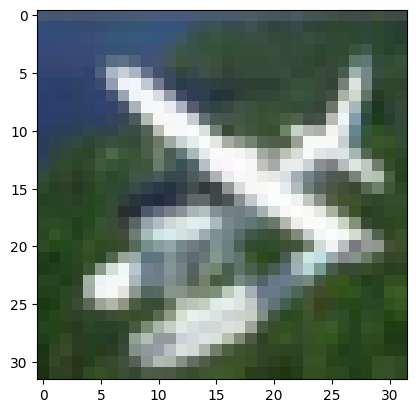

In [19]:
i = 2345
plt.imshow(X_train[i])
print(y_train[i]) #x represents the image, y represents the class

In [20]:
W_grid = 15

In [21]:
L_grid = 15

/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


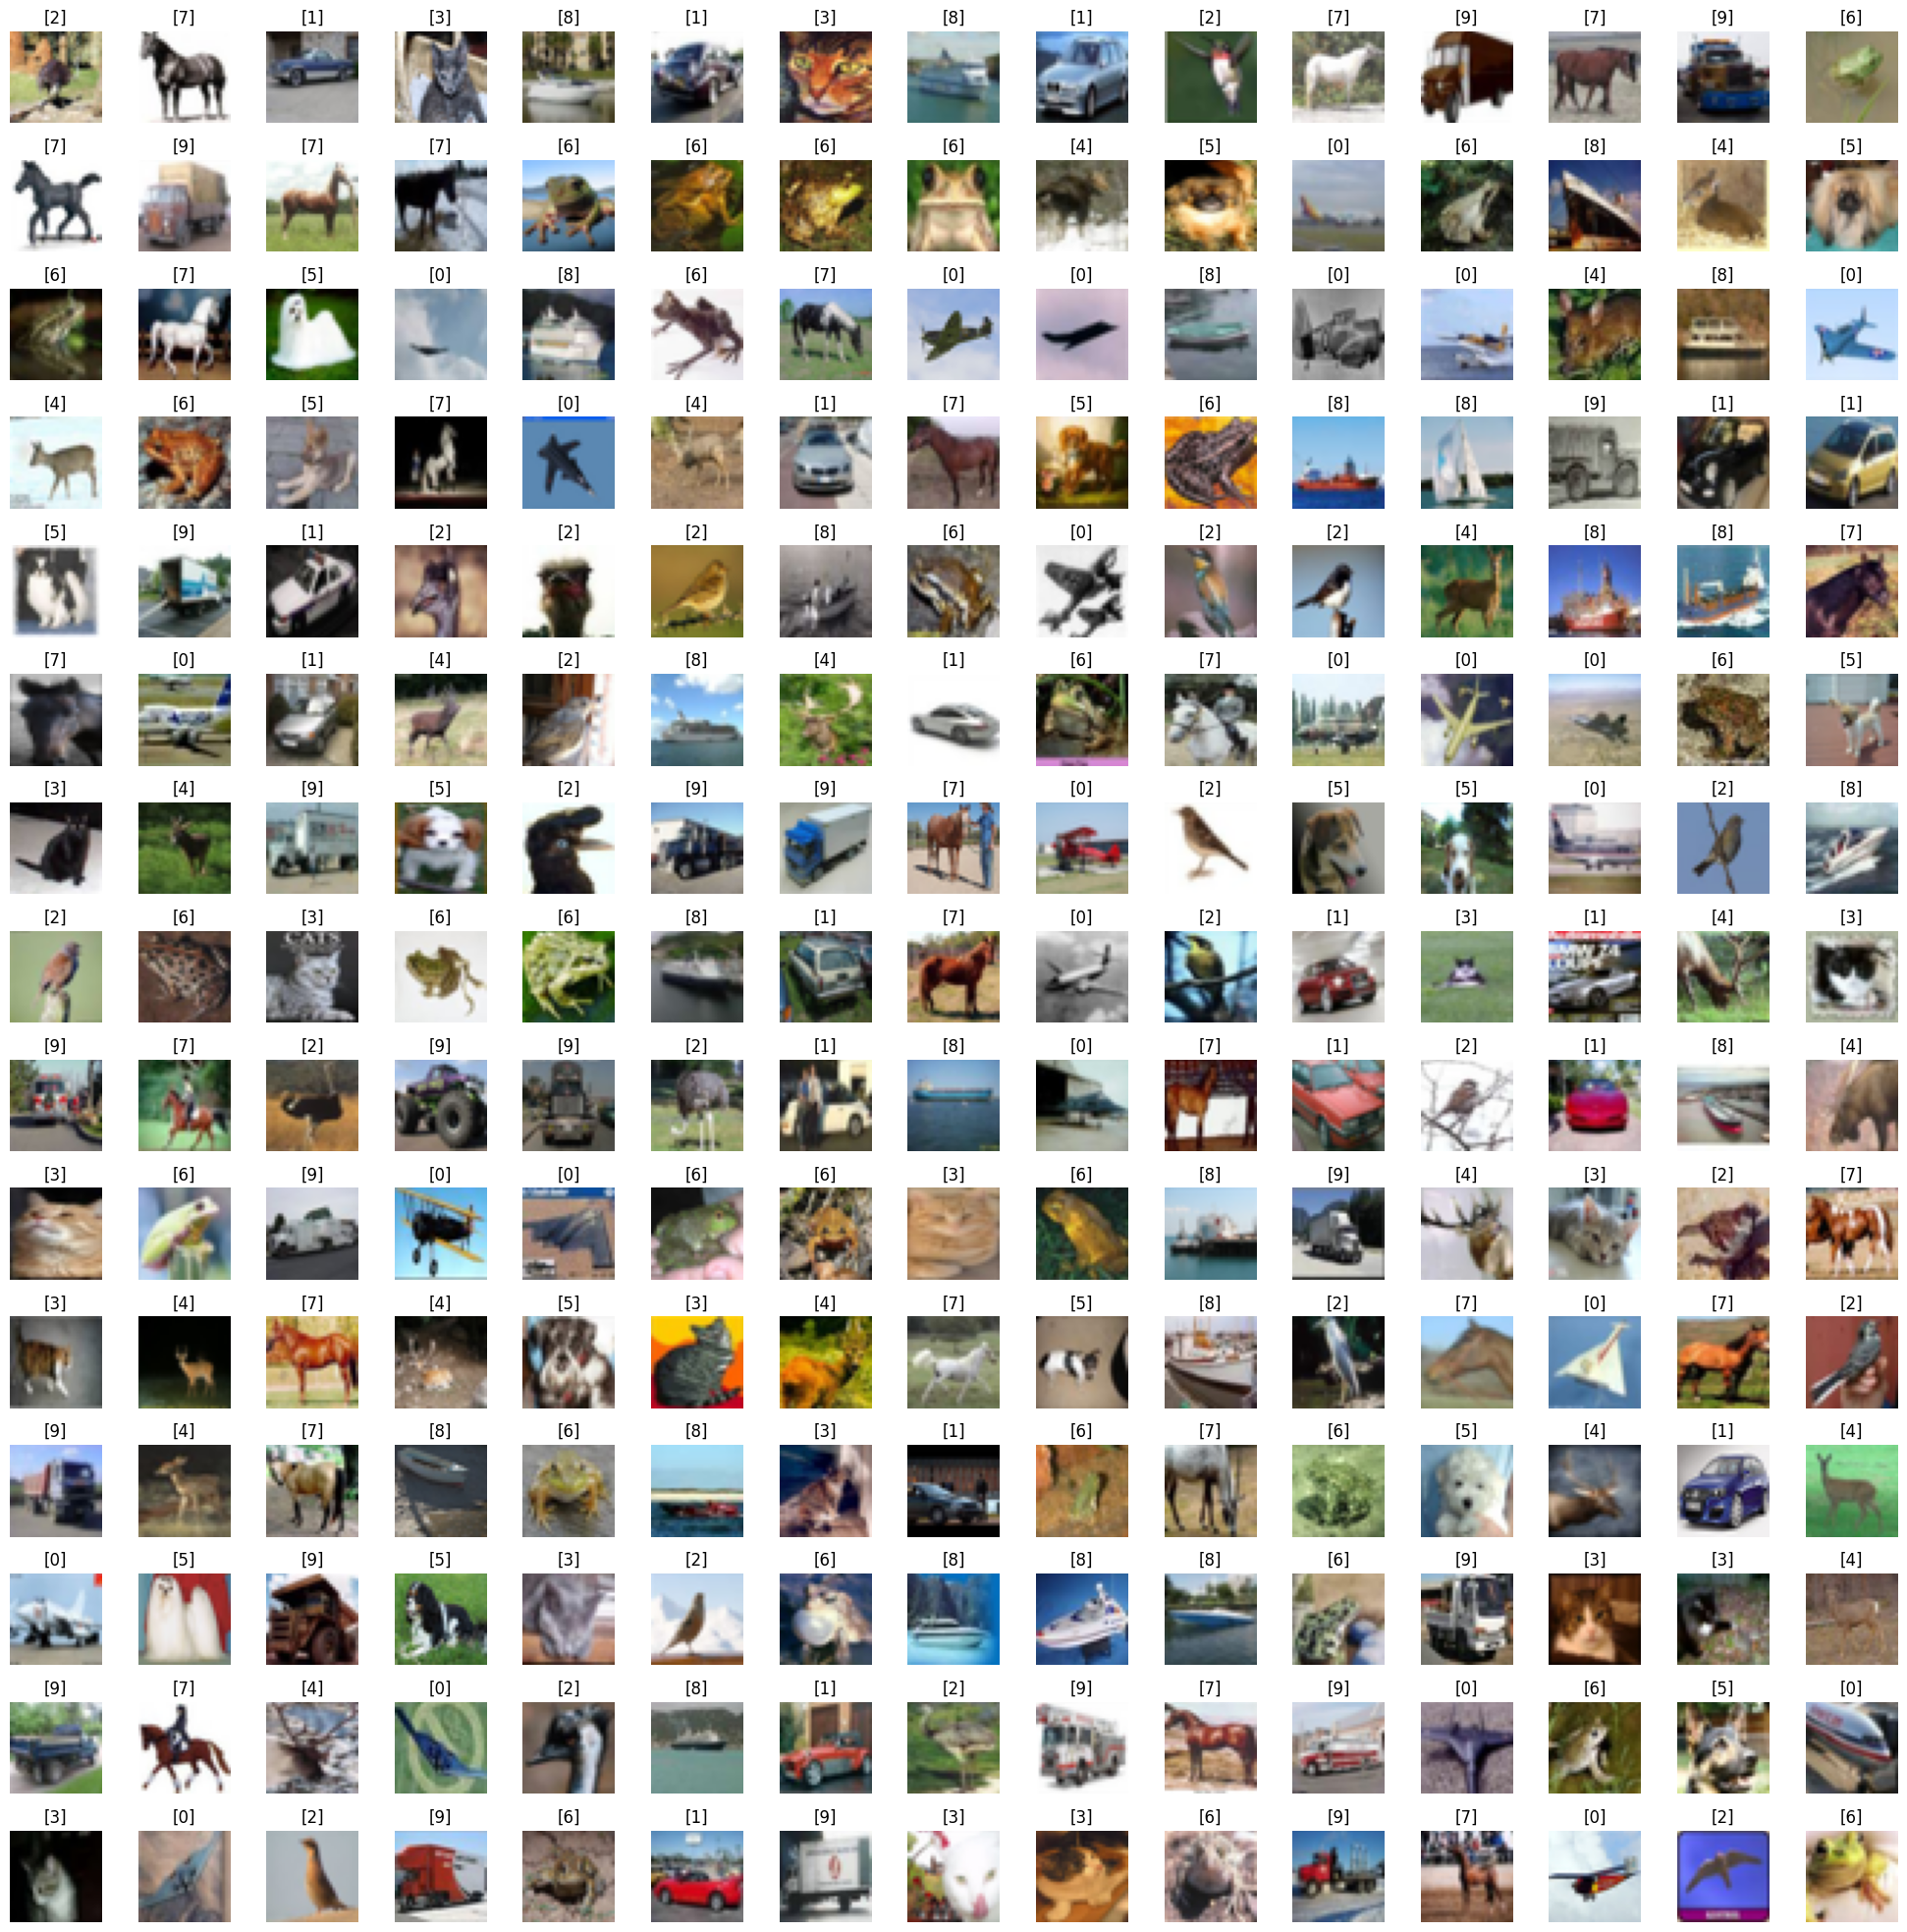

In [22]:
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for x in np.arange(0, L_grid * W_grid): # Adding a random image in each cell in the 15x15 grid
    index = np.random.randint(0, n_training) # Picking a random number
    axes[x].imshow(X_train[index])
    axes[x].set_title(y_train[index])
    axes[x].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [23]:
n_training

50000

In [24]:
# Data preparation

In [25]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [26]:
number_cat = 10

In [27]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [28]:
X_train = X_train/255# Data normalization
X_test = X_test/255

In [29]:
X_train.shape

(50000, 32, 32, 3)

In [30]:
Input_shape = X_train.shape[1:]

In [31]:
Input_shape


(32, 32, 3)

In [32]:
# training the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard 

#Keras flow as the API and tensorflow as the backend

In [33]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = Input_shape)) #feature detection, applying filter
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu")) #Adding convolutional layers
cnn_model.add(MaxPooling2D(2,2)) #maxpooling
cnn_model.add(Dropout(0.4)) #dropping out for efficiency


cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu")) #feature detection, applying filter
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
cnn_model.add(MaxPooling2D(2,2)) #maxpooling
cnn_model.add(Dropout(0.4)) 

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [34]:
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer= keras.optimizers.legacy.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)
y_test.shape

(10000, 10)

In [35]:

history = cnn_model.fit(X_train, y_train, batch_size=16, epochs=2, shuffle=True)

Epoch 1/2
3125/3125 [==============================] - 29s 9ms/step - loss: 1.5867 - accuracy: 0.4259
Epoch 2/2
3125/3125 [==============================] - 35s 11ms/step - loss: 1.3425 - accuracy: 0.5361


In [36]:
# Evaluating the model
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1])) # has to be new data (testing data), prevents overfitting


313/313 [==============================] - 2s 5ms/step - loss: 1.2454 - accuracy: 0.5579
Test Accuracy: 0.5579000115394592


In [37]:

predicted_classes = cnn_model.predict(X_test) #tells what are the predicted classes
predicted_classes = np.argmax(predicted_classes, axis=1)


313/313 [==============================] - 2s 6ms/step


In [38]:
X_test = X_test

In [39]:
y_test = y_test.argmax(1)


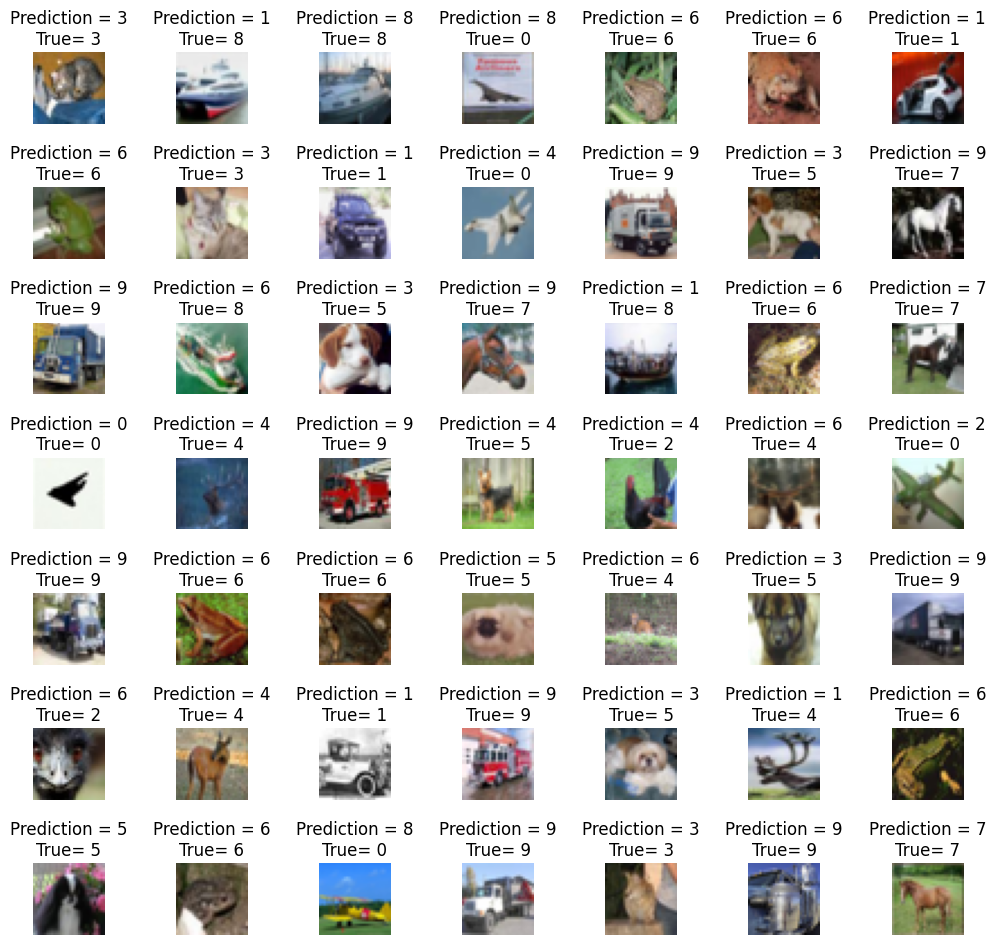

In [40]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,  L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\nTrue= {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace= 1)



In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [84]:
cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure()

array([[314,  88,  10,  42,  36,   3,  33,  20, 346, 108],
       [  2, 866,   0,   4,   0,   0,  14,   1,  18,  95],
       [ 30,  29, 105,  91, 282,  66, 202,  75,  70,  50],
       [  6,  24,   3, 416,  90, 116, 197,  44,  33,  71],
       [  8,  14,   5,  43, 536,  24, 172, 140,  19,  39],
       [  0,  22,   8, 291,  89, 383,  83,  64,  21,  39],
       [  1,  11,   4,  54,  67,   4, 806,   8,  11,  34],
       [  4,   9,   0,  62,  83,  69,  20, 657,   6,  90],
       [ 21,  92,   1,  21,  10,   2,  20,   6, 749,  78],
       [  8, 168,   2,  15,   3,   0,  20,   8,  29, 747]])